In [62]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
import seaborn as sns

data = pd.read_csv("../_data/10_features_jarvis.csv", sep=',',header=0)
data = data.drop(['gap opt'], axis=1)
data

,e_form,s_modulus,b_modulus,nsites,volume,density,uepa,epa,fepa,efermi,band_gap
0,0.161,71.22,196.200,2,21.187146,9.218965,-6.437923,-6.437923,0.006304,6.512574,0.0000
1,0.006,116.92,209.367,4,42.500796,9.200894,-6.778783,-6.778783,-0.002511,5.825621,0.0000
2,-0.014,-4.58,200.067,2,29.275922,8.612386,-8.642406,-8.642406,-0.037595,5.650979,0.0000
3,-0.210,42.96,92.700,2,27.304511,5.047594,-3.841391,-3.841391,-0.151182,5.729022,0.0000
4,-0.302,89.12,210.033,4,52.180854,8.559897,-6.728861,-6.728861,0.131568,6.541683,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
6585,-0.407,31.78,72.767,2,58.396618,10.396854,-7.637719,-7.848719,-0.631361,9.505370,0.0000
6586,0.101,16.68,78.667,8,155.880310,9.488630,-3.132369,-3.180369,-0.023702,5.156498,0.0000
6587,0.000,2.22,3.600,1,18.456188,1.815607,-0.025937,-0.025937,0.000000,-9.772494,11.7274
6588,0.000,7.48,9.867,4,217.494397,4.193889,-1.405472,-1.405472,0.513503,1.861210,0.0000


In [63]:
data['is_metal'] = 0

# Setting the values of the 'is_metal' column based on the band gap values
data.loc[data['band_gap'] > 0, 'is_metal'] = 0 # non-metal
data.loc[data['band_gap'] <= 0, 'is_metal'] = 1 # metal

In [64]:
data = data.drop(['is_metal'], axis=1)

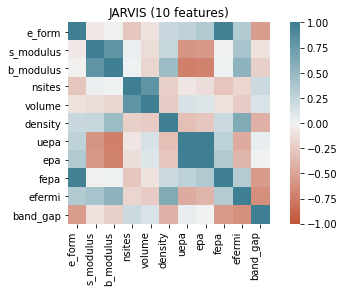

In [65]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

plt.tight_layout()
plt.title("JARVIS (10 features)")
plt.savefig('../plots/jarvis_plots/corr_10_features.pdf')

In [20]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=0)

x_train = np.array(data_train)
x_test = np.array(data_test)

NegativeCount = 0
PositiveCount = 0
for i in range(len(x_train)):
    if x_train[i][11]==0 :
        NegativeCount=NegativeCount+1
    if x_train[i][11]==1:
        PositiveCount=PositiveCount+1

positives = np.zeros((PositiveCount,12))
negatives = np.zeros((NegativeCount,12))
    
j, k = 0, 0
    
for i in range(len(x_train)):

    if(x_train[i,11] == 1):
        positives[j,:] = x_train[i,:]
        j=j+1
    if(x_train[i,11] == 0):
        negatives[k,:] = x_train[i,:]
        k=k+1

# Labels.

y_train = np.zeros(len(x_train))
y_test = np.zeros(len(x_test))

for i in range(len(x_test)):
    y_test[i] = x_test[i][11]
    x_test[i][11] = 1

for i in range(len(x_train)):
    y_train[i] = x_train[i][11]
    x_train[i][11] = 1

# Dropping 'gap' and 'is_metal'.

x_train = np.delete(x_train, 11, 1)
x_test = np.delete(x_test, 11, 1)

x_train = np.delete(x_train, 10, 1)
x_test = np.delete(x_test, 10, 1)

In [21]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_test_predict = rfc.predict(x_test)
conf_mat = confusion_matrix(y_test, rfc_test_predict)
accuracy = 100*accuracy_score(y_test, rfc_test_predict)

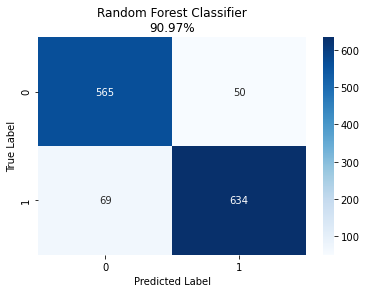

In [22]:
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Classifier\n' + "{:.2f}".format(accuracy) + '%')
plt.show()

TN, FP, FN, TP = conf_mat.ravel()

In [52]:
data=data.values
data=np.array(data)
for i in range(10):
    data[:,i]=(data[:,i]-data[:,i].min())/(data[:,i].max()-data[:,i].min())
data_train, data_test = train_test_split(data, test_size=0.1, random_state=0)
X_train=data_train[:,:10]
X_test=data_test[:,:10]
y_train=data_train[:,10]
y_test=data_test[:,10]

In [25]:
kernel = 'rbf'
C = [50]
gamma = [50]
epsilon = [0.2]
# Parameter dictionary
params_dict = {
    'C': C,
    'gamma': gamma,
    'epsilon': epsilon
}
# Grid parameter search
svr = SVR()
gsCV = GridSearchCV(
    estimator=svr,
    param_grid=params_dict,
    n_jobs=2,
    scoring='r2',
    cv=6
)

In [27]:
gsCV.fit(X_train, y_train)
svr = SVR(C=gsCV.best_params_['C'], kernel=kernel, gamma=gsCV.best_params_['gamma'],
          epsilon=gsCV.best_params_['epsilon'])
svr.fit(X_train, y_train)
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)
print("SVR model evaluation - Test Set:")
print('r^2:',r2_score(y_test, svr_test_pred))
print('RSE', mean_squared_error(y_test, svr_test_pred))
print('RAE', mean_absolute_error(y_test, svr_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,svr_test_pred)))

SVR model evaluation - Test Set:
r^2: 0.7425145992309541
RSE 0.6572437041236072
RAE 0.46784294813709004
RMSE: 0.8107056827996256


In [31]:
rf=RandomForestRegressor(criterion='mse',bootstrap=False,max_features=0.8,
max_depth=20,min_samples_split=5, n_estimators=15000,min_samples_leaf=3,random_state=0)
rf.fit(X_train, y_train)
rf_train_pred=rf.predict(X_train)
rf_test_pred=rf.predict(X_test)
print("Random Forest Regressor evaluation - Test Set:")
print('r^2:',r2_score(y_test, rf_test_pred))
print('RSE', mean_squared_error(y_test, rf_test_pred))
print('RAE', mean_absolute_error(y_test, rf_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,rf_test_pred)))

Random Forest Regressor evaluation - Test Set:
r^2: 0.7792553078277735
RSE 0.5634613019440015
RAE 0.3872651450217076
RMSE: 0.7506405943885539


In [53]:
params = {'n_estimators':21000, 'max_depth': 21, 'min_samples_split': 5,'max_features':0.8,'learning_rate': 0.001, 'loss': 'ls','random_state':0,'subsample': 0.85}
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
gbr_train_pred = gbr.predict(X_train)
gbr_test_pred = gbr.predict(X_test)
print("Model evaluation - Test Set:")
print('r^2:',r2_score(y_test, gbr_test_pred))
print('RSE', mean_squared_error(y_test, gbr_test_pred))
print('RAE', mean_absolute_error(y_test, gbr_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,gbr_test_pred)))

KeyboardInterrupt: 

In [33]:
# checking correlation matrix
corr_matrix = data.corr().abs()

# Creating a boolean mask of the highly correlated features
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
highly_correlated_features = corr_matrix.mask(mask).stack().sort_values(ascending=False)

# Printing the highly correlated features
print("Highly correlated features:")
print(highly_correlated_features[highly_correlated_features > 0.9])

Highly correlated features:
epa   uepa      0.99084
fepa  e_form    0.95969
dtype: float64


In [66]:
data = data.drop(['uepa',  'e_form'], axis=1)
data

,s_modulus,b_modulus,nsites,volume,density,epa,fepa,efermi,band_gap
0,71.22,196.200,2,21.187146,9.218965,-6.437923,0.006304,6.512574,0.0000
1,116.92,209.367,4,42.500796,9.200894,-6.778783,-0.002511,5.825621,0.0000
2,-4.58,200.067,2,29.275922,8.612386,-8.642406,-0.037595,5.650979,0.0000
3,42.96,92.700,2,27.304511,5.047594,-3.841391,-0.151182,5.729022,0.0000
4,89.12,210.033,4,52.180854,8.559897,-6.728861,0.131568,6.541683,0.0000
...,...,...,...,...,...,...,...,...,...
6585,31.78,72.767,2,58.396618,10.396854,-7.848719,-0.631361,9.505370,0.0000
6586,16.68,78.667,8,155.880310,9.488630,-3.180369,-0.023702,5.156498,0.0000
6587,2.22,3.600,1,18.456188,1.815607,-0.025937,0.000000,-9.772494,11.7274
6588,7.48,9.867,4,217.494397,4.193889,-1.405472,0.513503,1.861210,0.0000


In [60]:
data.to_csv('../_data/8_features_jarvis.csv')

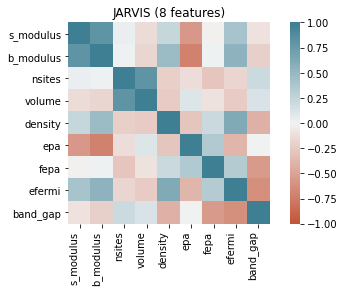

In [67]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

plt.tight_layout()
plt.title("JARVIS (8 features)")
plt.savefig('../plots/jarvis_plots/corr_8_features.pdf')

In [38]:
data['is_metal'] = 0

# Setting the values of the 'is_metal' column based on the band gap values
data.loc[data['band_gap'] > 0, 'is_metal'] = 0 # non-metal
data.loc[data['band_gap'] <= 0, 'is_metal'] = 1 # metal

In [39]:
data

,s_modulus,b_modulus,nsites,volume,density,epa,fepa,efermi,band_gap,is_metal
0,71.22,196.200,2,21.187146,9.218965,-6.437923,0.006304,6.512574,0.0000,1
1,116.92,209.367,4,42.500796,9.200894,-6.778783,-0.002511,5.825621,0.0000,1
2,-4.58,200.067,2,29.275922,8.612386,-8.642406,-0.037595,5.650979,0.0000,1
3,42.96,92.700,2,27.304511,5.047594,-3.841391,-0.151182,5.729022,0.0000,1
4,89.12,210.033,4,52.180854,8.559897,-6.728861,0.131568,6.541683,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
6585,31.78,72.767,2,58.396618,10.396854,-7.848719,-0.631361,9.505370,0.0000,1
6586,16.68,78.667,8,155.880310,9.488630,-3.180369,-0.023702,5.156498,0.0000,1
6587,2.22,3.600,1,18.456188,1.815607,-0.025937,0.000000,-9.772494,11.7274,0
6588,7.48,9.867,4,217.494397,4.193889,-1.405472,0.513503,1.861210,0.0000,1


In [40]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=0)

x_train = np.array(data_train)
x_test = np.array(data_test)

NegativeCount = 0
PositiveCount = 0
for i in range(len(x_train)):
    if x_train[i][9]==0 :
        NegativeCount=NegativeCount+1
    if x_train[i][9]==1:
        PositiveCount=PositiveCount+1

positives = np.zeros((PositiveCount,10))
negatives = np.zeros((NegativeCount,10))
    
j, k = 0, 0
    
for i in range(len(x_train)):

    if(x_train[i,9] == 1):
        positives[j,:] = x_train[i,:]
        j=j+1
    if(x_train[i,9] == 0):
        negatives[k,:] = x_train[i,:]
        k=k+1

# Labels.

y_train = np.zeros(len(x_train))
y_test = np.zeros(len(x_test))

for i in range(len(x_test)):
    y_test[i] = x_test[i][9]
    x_test[i][9] = 1

for i in range(len(x_train)):
    y_train[i] = x_train[i][9]
    x_train[i][9] = 1

# Dropping 'gap' and 'is_metal'.

x_train = np.delete(x_train, 9, 1)
x_test = np.delete(x_test, 9, 1)

x_train = np.delete(x_train, 8, 1)
x_test = np.delete(x_test, 8, 1)

In [41]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_test_predict = rfc.predict(x_test)
conf_mat = confusion_matrix(y_test, rfc_test_predict)
accuracy = 100*accuracy_score(y_test, rfc_test_predict)

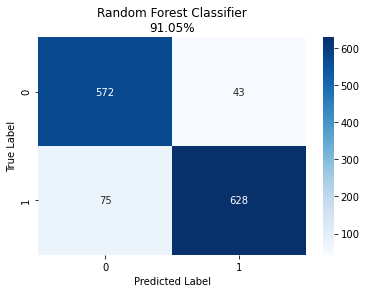

In [42]:
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Classifier\n' + "{:.2f}".format(accuracy) + '%')
plt.show()

TN, FP, FN, TP = conf_mat.ravel()